# Assessment 2 - Part 1: Machine Learning
<br>

## Task: train regression models that predict two indicators of energy efficiency based on 8 numerical inputs. 
<br>

### Packages needed:

- pandas
- sklearn
- numpy
- matplotlib

### 1.1 - Data Preparation

#### Importing libraries

In [ ]:
## Imports
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Used for normalising the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Used for regression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Used for assessment of regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Used for cross validation
from sklearn.model_selection import cross_val_score

#### Loading the dataset

In [ ]:
energy_data = pd.read_excel("data.xlsx")

energy_data.head()

#### Extracting and splitting data

In [ ]:
#inputs
inputs = energy_data.values[:,:8].astype(float)

# Projecting data into 2 dimensions with PCA.
pca = PCA(n_components = 2)
compressed_inputs = pca.fit_transform(inputs)

#normalise the inputs
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)

#targets
targets =  energy_data.values[:,8:].astype(float)

# Print the range of the variables to show the normalisation effect.
print(inputs.ptp(axis=0))
print(scaled_inputs.ptp(axis=0))

#### Setting up train and test data

In [ ]:
#set up data
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.3, random_state=0)

### Task 1.2 - Regression

#### Regression using the "sklearn.neural_network.MLPRegressor"

In [21]:
MLP = MLPRegressor(max_iter=10000)
MLP.fit(x_train, y_train)

y_pred = MLP.predict(x_test)


MLP_test = abs(cross_val_score(MLP, x_test, y_test, cv=10, scoring='neg_mean_squared_error'))
print(MLP_test)

MLP_train = abs(cross_val_score(MLP, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(MLP_train)

[18.20597118 14.1628173   9.70867384 10.2829781   9.5145559  11.9072484
 13.83947213  6.17263123  4.90308828  9.77480974]
[7.72792488 3.36077817 6.00158203 7.54680889 4.87595599 4.21882323
 8.23730529 7.68579437 5.84740267 4.11441311]


#### Regression using the "sklearn.ensemble.RandomForestRegressor"

In [22]:
Forest = RandomForestRegressor()

Forest.fit(x_train, y_train)

y_pred = MLP.predict(x_test)

Forest_test = abs(cross_val_score(Forest, x_test, y_test, cv=10, scoring='neg_mean_squared_error'))
print(Forest_test)
Forest_train = abs(cross_val_score(Forest, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(Forest_train)


[2.77802087 3.87424752 2.80716815 2.28376484 2.08697698 3.88917065
 1.76172358 2.54105047 1.75974454 2.34688927]
[1.84316303 1.90920855 2.3990481  2.77559399 1.58394078 1.47618768
 2.45557389 2.81232248 1.56389257 1.73280097]


#### Regression using the "sklearn.svm.SVR"

In [23]:
SVR_Regressor = SVR()

SVR_Regressor.fit(x_train, y_train[:, 0])
y_pred_1 = SVR_Regressor.predict(x_test)

SVR_Regressor.fit(x_train, y_train[:, 1])
y_pred_2 = SVR_Regressor.predict(x_test)

SVR_test_1 = abs(cross_val_score(SVR_Regressor, x_test, y_test[:, 0], cv=10, scoring='neg_mean_squared_error'))
SVR_test_2 = abs(cross_val_score(SVR_Regressor, x_test, y_test[:, 1], cv=10, scoring='neg_mean_squared_error'))
print(SVR_test_1)
print(SVR_test_2)

SVR_train_1 = abs(cross_val_score(SVR_Regressor, x_train, y_train[:, 0], cv=10, scoring='neg_mean_squared_error'))
SVR_train_2 = abs(cross_val_score(SVR_Regressor, x_train, y_train[:, 1], cv=10, scoring='neg_mean_squared_error'))
print(SVR_train_1)
print(SVR_train_2)

[19.57278702 14.10091589 12.32642995 11.21899734 16.54835179 11.3592075
  9.98089175 15.78059493  6.25546775  8.87787701]
[12.89202745 13.18606233 10.98275636 15.46517906  8.46730159 13.89669824
 11.64078598 15.97661588  5.64908255 10.84510372]
[ 8.55407455  5.706869   11.00901533  9.29087477  7.09384773  5.84888671
 10.7495821   8.95315248  6.53782088  7.76652096]
[ 8.73358569  5.03557641 16.12654049 12.82419266  9.14555762  7.79372501
 17.05227367 16.62952324  8.08087012  9.34214463]


### Task 1.3 - Assessment of  Regression

#### Boxplot

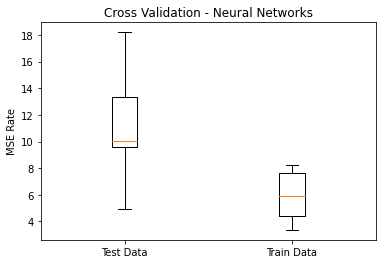

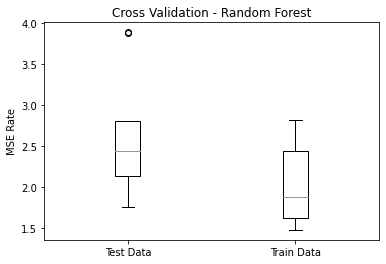

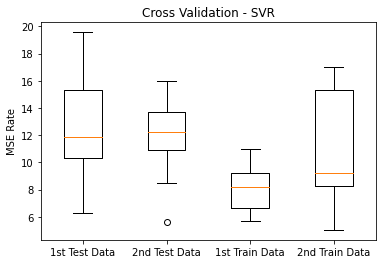

In [24]:
Forest_DATA = [Forest_test, Forest_train]
MLP_DATA = [MLP_test, MLP_train]
SVR_DATA = [SVR_test_1, SVR_test_2, SVR_train_1, SVR_train_2]

## Neural Network Model

plt.figure()
plt.title("Cross Validation - Neural Networks")

# Creating plot
plt.boxplot(MLP_DATA)

plt.xticks([1, 2], ['Test Data', 'Train Data'])
plt.ylabel('MSE Rate')

# show plot
plt.show()

## Forest Model

plt.figure()
plt.title("Cross Validation - Random Forest")

# Creating plot
plt.boxplot(Forest_DATA)

plt.xticks([1, 2], ['Test Data', 'Train Data'])
plt.ylabel('MSE Rate')

# show plot
plt.show()

## SVR Model

plt.figure()
plt.title("Cross Validation - SVR")

# Creating plot
plt.boxplot(SVR_DATA)

plt.xticks([1, 2, 3, 4], ['1st Test Data', '2nd Test Data', '1st Train Data', '2nd Train Data'])
plt.ylabel('MSE Rate')

# show plot
plt.show()